<a href="https://colab.research.google.com/github/Mohanvarmad/Machine-Learning/blob/master/optimization/Graph_vertex_coloring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries

In [ ]:
!pip install pyomo

     |████████████████████████████████| 9.4MB 5.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 256kB 51.2MB/s 
     |████████████████████████████████| 163kB 49.4MB/s 


In [ ]:
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
import pandas as pd
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverFactory

### Creating sample scenario for graph coloring

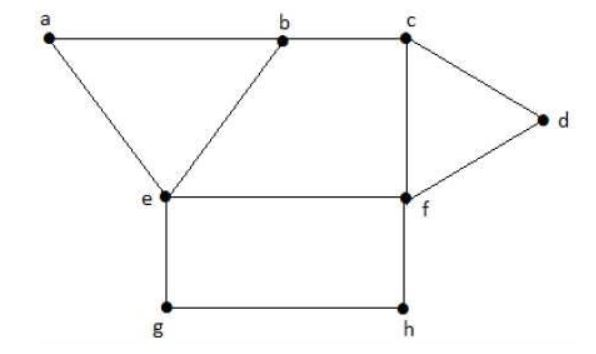

In [ ]:
model= ConcreteModel()

### Defining data
colorList = list(range(1, 8+1))
edges = set([('a', 'b'), ('a', 'e'), ('b', 'c'), ('e', 'b'), ('e', 'f'), ('e', 'g'), ('e', 'h'), ('c', 'd'), ('c', 'f'), ('f', 'd'), ('f', 'h')])
vertices = set(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

model.X = Var(vertices, colorList, initialize = 0, within = Binary)
model.y = Var()

### Defining constraints
### No two adjacent vertex shouldnt have same
model.adj_edge = ConstraintList()
for i,j in edges:
  for c in colorList:
    model.adj_edge.add(model.X[i, c] + model.X[j, c] <= 1)
    
### Only one color assigment
model.one_color = ConstraintList()
for v in vertices:
    model.one_color.add(sum(model.X[v, c] for c in colorList) == 1)

### COnstraint on minimum number of colors
model.min_color = ConstraintList()
for v in vertices:
  for c in colorList:
    model.min_color.add(model.y >= c*model.X[v,c])

model.Obj = Objective(expr = model.y)


In [ ]:
opt = SolverFactory('cbc', sense = 'minimize')

In [ ]:
opt.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 3.0, 'Upper bound': 3.0, 'Number of objectives': 1, 'Number of constraints': 160, 'Number of variables': 65, 'Number of binary variables': 64, 'Number of integer variables': 64, 'Number of nonzeros': 1, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'User time': -1.0, 'System time': 0.13, 'Wallclock time': 0.13, 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}, 'Black box': {'Number of iterations': 0}}, 'Error rc': 0, 'Time': 0.14908337593078613}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [ ]:
model.X.display()

X : Size=64, Index=X_index
    Key      : Lower : Value : Upper : Fixed : Stale : Domain
    ('a', 1) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 2) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 3) :     0 :   1.0 :     1 : False : False : Binary
    ('a', 4) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 5) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 6) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 7) :     0 :   0.0 :     1 : False : False : Binary
    ('a', 8) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 1) :     0 :   1.0 :     1 : False : False : Binary
    ('b', 2) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 3) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 4) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 5) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 6) :     0 :   0.0 :     1 : False : False : Binary
    ('b', 7) :     0 :   0.0 :     1 : Fals

In [ ]:
solutionDf = pd.DataFrame({'i': [i[0] for i in model.X.iterkeys()], 'j': [i[1] for i in model.X.iterkeys()], 'assignment': [i.value for i in model.X.itervalues()]})
solutionDf = solutionDf[solutionDf['assignment'] == 1]

In [ ]:
solutionDf

,i,j,assignment
2,h,3,1.0
9,e,2,1.0
18,c,3,1.0
26,a,3,1.0
34,g,3,1.0
40,b,1,1.0
49,d,2,1.0
56,f,1,1.0


In [ ]:
['blue', 'green', 'yellow']